### Semana 06 - lec 01 - exemplos

  - Iris dataset



In [1]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
%matplotlib inline

google --> pip install library/package

Anaconda: # seguros e lentos

os.system("conda install -c plotly plotly")
os.system("conda install -c plotly/label/test plotly")

Anaconda - manager
   ... via interação com tela instala o Plotly
  
  
PyPi - mais rápido, mas pode danificar o Anaconda
++++

os.system("pip install plotly")

### Iris

Anderson's Iris data set because Edgar Anderson  
https://en.wikipedia.org/wiki/Iris_flower_data_set

In [25]:
fname  = os.path.join("../data/", 'Iris.csv')
print(fname, os.path.exists(fname))
df = pd.read_csv(fname)

../data/Iris.csv True


In [26]:
print(df.shape)
df.columns

(150, 6)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [27]:
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [28]:
# renomeando
df.columns = ['id', 'sepal_len', 'sepal_width', 'petal_len', 'petal_width', 'species']
# mudando a ordem dos campos
df = df[ ['id', 'species', 'sepal_len', 'sepal_width', 'petal_len', 'petal_width'] ]
df.head(3)

,id,species,sepal_len,sepal_width,petal_len,petal_width
0,1,Iris-setosa,5.1,3.5,1.4,0.2
1,2,Iris-setosa,4.9,3.0,1.4,0.2
2,3,Iris-setosa,4.7,3.2,1.3,0.2


In [16]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Groupby

In [29]:
# groupby --> iterator com range()
#   devolve dois objetos:
#         1) groupby(species) --> species
#         2) dataframe de cada espécie
dfg = df.groupby('species')

for spc, dfa in dfg:
    print(spc)
    print(dfa.iloc[:3])
    print('')

Iris-setosa
   id      species  sepal_len  sepal_width  petal_len  petal_width
0   1  Iris-setosa        5.1          3.5        1.4          0.2
1   2  Iris-setosa        4.9          3.0        1.4          0.2
2   3  Iris-setosa        4.7          3.2        1.3          0.2

Iris-versicolor
    id          species  sepal_len  sepal_width  petal_len  petal_width
50  51  Iris-versicolor        7.0          3.2        4.7          1.4
51  52  Iris-versicolor        6.4          3.2        4.5          1.5
52  53  Iris-versicolor        6.9          3.1        4.9          1.5

Iris-virginica
      id         species  sepal_len  sepal_width  petal_len  petal_width
100  101  Iris-virginica        6.3          3.3        6.0          2.5
101  102  Iris-virginica        5.8          2.7        5.1          1.9
102  103  Iris-virginica        7.1          3.0        5.9          2.1



### Outra forma de fazer medias

In [30]:
df.groupby('species').sepal_len.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_len, dtype: float64

### Media de vários campos

In [31]:
df.groupby('species')[ ['sepal_len', 'sepal_width'] ].mean()

,sepal_len,sepal_width
species,,
Iris-setosa,5.006,3.418
Iris-versicolor,5.936,2.770
Iris-virginica,6.588,2.974


### Rever o conceito de dictionary

In [32]:
dic = {'sepal_len': 'mean', 'sepal_width': 'mean'}
print(dic)
df.groupby('species').agg(dic)

{'sepal_len': 'mean', 'sepal_width': 'mean'}


,sepal_len,sepal_width
species,,
Iris-setosa,5.006,3.418
Iris-versicolor,5.936,2.770
Iris-virginica,6.588,2.974


In [48]:
# operaçoes matematicas --> numpy
ops = ['mean', 'median', 'std', 'count', 'min', 'max']

dic = {'sepal_len': ops, 'sepal_width': ops, 'petal_len': ops, 'petal_width': ops}
dic

{'sepal_len': ['mean', 'median', 'std', 'count', 'min', 'max'],
 'sepal_width': ['mean', 'median', 'std', 'count', 'min', 'max'],
 'petal_len': ['mean', 'median', 'std', 'count', 'min', 'max'],
 'petal_width': ['mean', 'median', 'std', 'count', 'min', 'max']}

In [52]:
# chaves do dicionario
dic.keys()

dict_keys(['sepal_len', 'sepal_width', 'petal_len', 'petal_width'])

In [53]:
for key in dic.keys():
    print(key, '\t', dic[key])

sepal_len 	 ['mean', 'median', 'std', 'count', 'min', 'max']
sepal_width 	 ['mean', 'median', 'std', 'count', 'min', 'max']
petal_len 	 ['mean', 'median', 'std', 'count', 'min', 'max']
petal_width 	 ['mean', 'median', 'std', 'count', 'min', 'max']


### Várias operações simultâneas

In [34]:
list(df.columns)

['id', 'species', 'sepal_len', 'sepal_width', 'petal_len', 'petal_width']

In [54]:
# lista de operadores estatisticos --> pandas ler quais eles ... relativos ou stats/numpy
ops = ['mean', 'median', 'std', 'count', 'min', 'max']
dic = {'sepal_len': ops, 'sepal_width': ops}
print(dic)

# aggregate: DataFrame (pandas)
dfg = df.groupby('species').agg(dic)
dfg

{'sepal_len': ['mean', 'median', 'std', 'count', 'min', 'max'], 'sepal_width': ['mean', 'median', 'std', 'count', 'min', 'max']}


sepal_len                                  sepal_width         \
                     mean median       std count  min  max        mean median   
species                                                                         
Iris-setosa         5.006    5.0  0.352490    50  4.3  5.8       3.418    3.4   
Iris-versicolor     5.936    5.9  0.516171    50  4.9  7.0       2.770    2.8   
Iris-virginica      6.588    6.5  0.635880    50  4.9  7.9       2.974    3.0   

                                           
                      std count  min  max  
species                                    
Iris-setosa      0.381024    50  2.3  4.4  
Iris-versicolor  0.313798    50  2.0  3.4  
Iris-virginica   0.322497    50  2.2  3.8

### Groupby.agg() é uma tabela

In [36]:
dftab = dfg.reset_index()
print(list(dftab.columns))
dftab.head(3)

[('species', ''), ('sepal_len', 'mean'), ('sepal_len', 'median'), ('sepal_len', 'std'), ('sepal_len', 'count'), ('sepal_len', 'min'), ('sepal_len', 'max'), ('sepal_width', 'mean'), ('sepal_width', 'median'), ('sepal_width', 'std'), ('sepal_width', 'count'), ('sepal_width', 'min'), ('sepal_width', 'max')]


species sepal_len                                  sepal_width  \
                        mean median       std count  min  max        mean   
0      Iris-setosa     5.006    5.0  0.352490    50  4.3  5.8       3.418   
1  Iris-versicolor     5.936    5.9  0.516171    50  4.9  7.0       2.770   
2   Iris-virginica     6.588    6.5  0.635880    50  4.9  7.9       2.974   

                                    
  median       std count  min  max  
0    3.4  0.381024    50  2.3  4.4  
1    2.8  0.313798    50  2.0  3.4  
2    3.0  0.322497    50  2.2  3.8

In [37]:
for a,b in dftab.columns:
    print(a,b)

species 
sepal_len mean
sepal_len median
sepal_len std
sepal_len count
sepal_len min
sepal_len max
sepal_width mean
sepal_width median
sepal_width std
sepal_width count
sepal_width min
sepal_width max


In [38]:
cols = []

for a,b in dftab.columns:
    if a == 'species':
        cols.append(a)
    else:
        cols.append(a + '_' + b)
        
cols

['species',
 'sepal_len_mean',
 'sepal_len_median',
 'sepal_len_std',
 'sepal_len_count',
 'sepal_len_min',
 'sepal_len_max',
 'sepal_width_mean',
 'sepal_width_median',
 'sepal_width_std',
 'sepal_width_count',
 'sepal_width_min',
 'sepal_width_max']

In [39]:
dftab.columns = cols
dftab.head(4)

,species,sepal_len_mean,sepal_len_median,sepal_len_std,sepal_len_count,sepal_len_min,sepal_len_max,sepal_width_mean,sepal_width_median,sepal_width_std,sepal_width_count,sepal_width_min,sepal_width_max
0,Iris-setosa,5.006,5.0,0.352490,50,4.3,5.8,3.418,3.4,0.381024,50,2.3,4.4
1,Iris-versicolor,5.936,5.9,0.516171,50,4.9,7.0,2.770,2.8,0.313798,50,2.0,3.4
2,Iris-virginica,6.588,6.5,0.635880,50,4.9,7.9,2.974,3.0,0.322497,50,2.2,3.8


### Como calcula o SEM? standard error of mean

SEM - precisão que se tem com relação à media

 - n (amostral) cresce muito --> tem certeza da media -- SEM tende a 0  
 - n baixo  ~  S = SSD (sample standard deviation)
 
SEM = std(x) / sqrt(n)

In [40]:
dftab['sepal_len_sem'] = dftab.sepal_len_std / np.sqrt(dftab.sepal_len_count)

In [41]:
dftab['sepal_width_sem'] = dftab.sepal_width_std / np.sqrt(dftab.sepal_width_count)

In [44]:
len(dftab.columns), dftab.columns

(15,
 Index(['species', 'sepal_len_mean', 'sepal_len_median', 'sepal_len_std',
        'sepal_len_count', 'sepal_len_min', 'sepal_len_max', 'sepal_width_mean',
        'sepal_width_median', 'sepal_width_std', 'sepal_width_count',
        'sepal_width_min', 'sepal_width_max', 'sepal_len_sem',
        'sepal_width_sem'],
       dtype='object'))

In [46]:
cols = ['species', 
        'sepal_len_mean',   'sepal_len_median',   'sepal_len_std',   'sepal_len_sem',   'sepal_len_count',   'sepal_len_min', 'sepal_len_max', 
        'sepal_width_mean', 'sepal_width_median', 'sepal_width_std', 'sepal_width_sem', 'sepal_width_count', 'sepal_width_min', 'sepal_width_max' ]
len(cols)

dftab = dftab[ cols ]
dftab.head(3)

,species,sepal_len_mean,sepal_len_median,sepal_len_std,sepal_len_sem,sepal_len_count,sepal_len_min,sepal_len_max,sepal_width_mean,sepal_width_median,sepal_width_std,sepal_width_sem,sepal_width_count,sepal_width_min,sepal_width_max
0,Iris-setosa,5.006,5.0,0.352490,0.049850,50,4.3,5.8,3.418,3.4,0.381024,0.053885,50,2.3,4.4
1,Iris-versicolor,5.936,5.9,0.516171,0.072998,50,4.9,7.0,2.770,2.8,0.313798,0.044378,50,2.0,3.4
2,Iris-virginica,6.588,6.5,0.635880,0.089927,50,4.9,7.9,2.974,3.0,0.322497,0.045608,50,2.2,3.8


### Boxplot (seaborn ~ sns)

https://seaborn.pydata.org/examples/grouped_boxplot.html

In [55]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

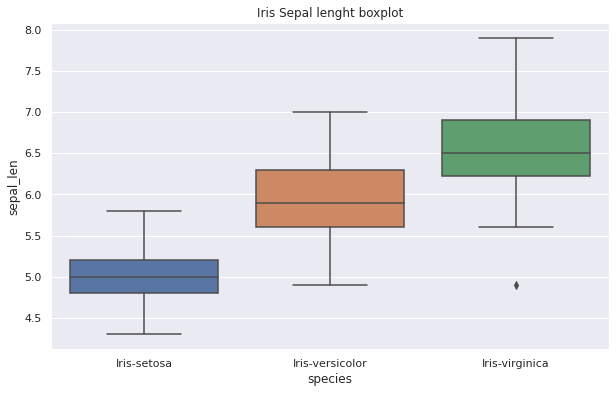

In [56]:
# plt.figure(figsize = (x,y))
sns.set(rc={"figure.figsize": (10,6)})

sns.boxplot(x="species", y="sepal_len", data=df)

plt.title("Iris Sepal lenght boxplot");

### Múltiplos plots

In [61]:
print(df.columns)

measures = ['sepal_len', 'sepal_width', 'petal_len', 'petal_width']
measures

Index(['id', 'species', 'sepal_len', 'sepal_width', 'petal_len',
       'petal_width'],
      dtype='object')


['sepal_len', 'sepal_width', 'petal_len', 'petal_width']

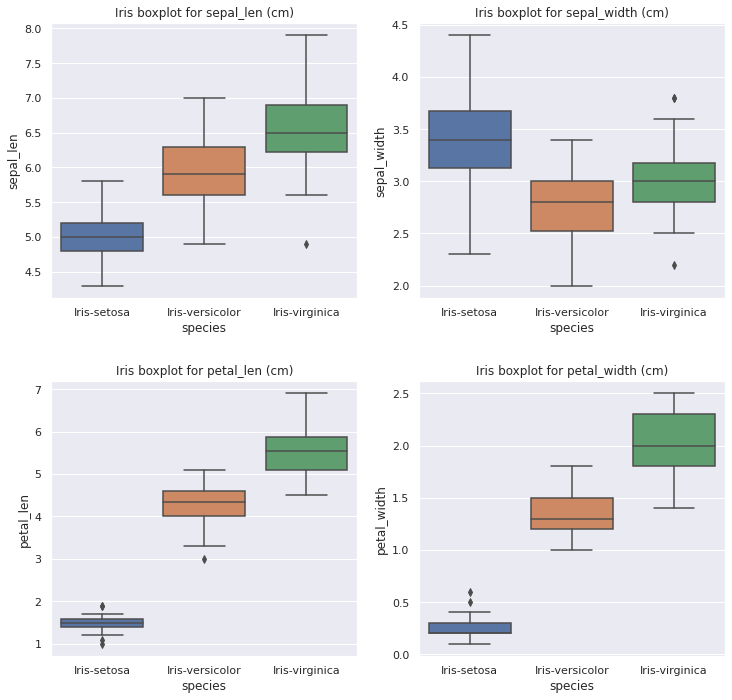

In [62]:
from pylab import subplot

sns.set(rc={"figure.figsize": (12,11)})


nfig = 0
for meas in measures:
    nfig += 1
    # subplot --> 1,2,3,4 ...
    subplot(2,2,nfig)
    sns.boxplot(x="species", y=meas, data=df)
    plt.title("Iris boxplot for %s (cm)"%meas);
    
plt.subplots_adjust(left=0.12, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3) ;

### Violin plot

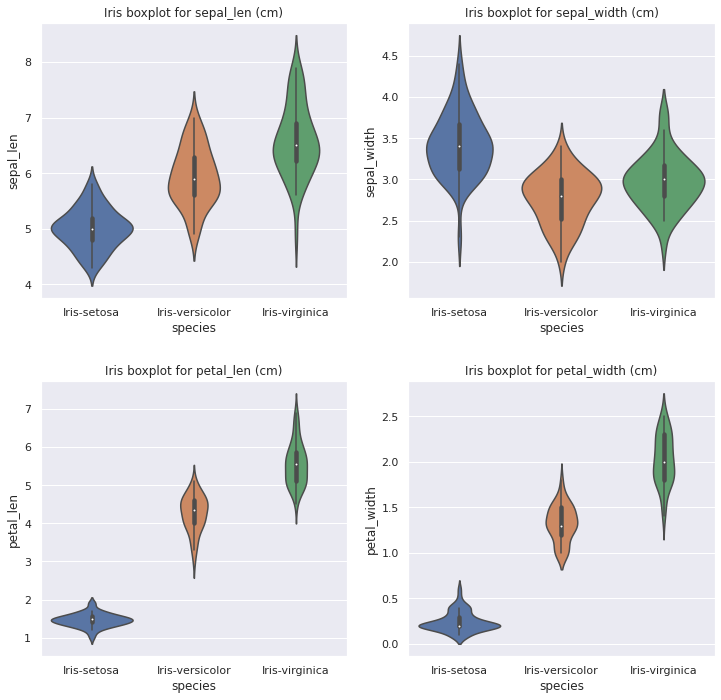

In [63]:
from pylab import subplot

sns.set(rc={"figure.figsize": (12,11)})


nfig = 0
for meas in measures:
    nfig += 1
    subplot(2,2,nfig)
    sns.violinplot(x="species", y=meas, data=df)
    plt.title("Iris boxplot for %s (cm)"%meas);
    
plt.subplots_adjust(left=0.12, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3) ;    

### Correlation

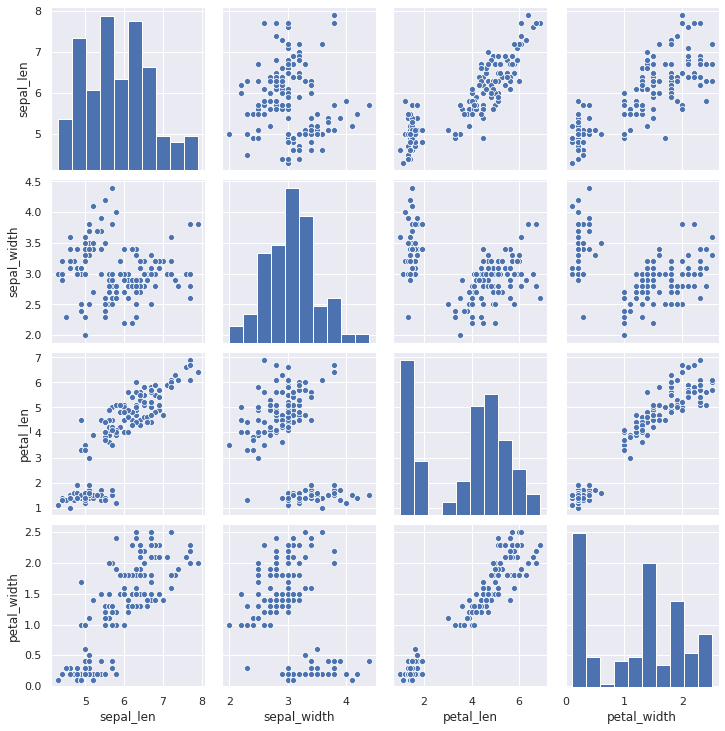

In [64]:
# sns.color_palette("Set2")
# colors = ['blue', 'cyan', 'red', 'orange']
sns.pairplot(df[measures]);

### Heatmap

In [65]:
df[measures].corr()

,sepal_len,sepal_width,petal_len,petal_width
sepal_len,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_len,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
### cmaps

'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
        
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html   

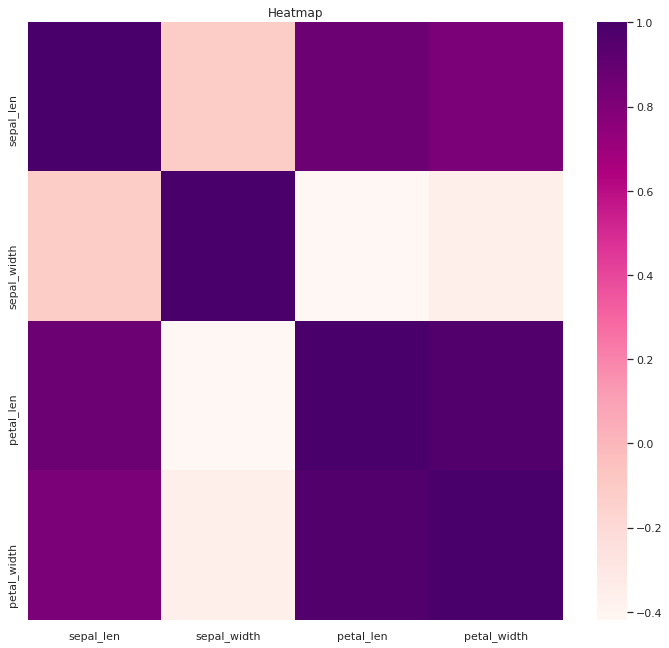

In [70]:
plt.title("Heatmap")
sns.heatmap(df[measures].corr(), cmap='RdPu');